# Risk Analysis of Covid19 Virus

As the outbreak of coronavirus disease 2019 (COVID-19) progresses, epidemiological data are needed to guide situational awareness and intervention strategies. The enormous impact of the COVID-19 pandemic is obvious. What many still haven’t realized, however, is that the impact on ongoing data science production setups has been dramatic, too. Artificial Intelligence is actively used in identifying high risk patients at an earlier stage and therefore helps to control the spread of the infection in real-time. This becomes particularly important at this time of crisis because real time monitoring is the best option for people to self-isolate and mitigate the spread of the virus.

# Objective 1

1. Given a person and his/her vital data, predict the viability of a RT-PCR test. Basically predict the probability of risk for the given person. The following data inputs could be provided (you can add 3 more attributes)

       a. Name, Age, Gender, Address, Blood Pressure, Cough, Fever, travel history 
       b. Make sure that an optimum position is obtained for the precision and recall metrics. 
       c. Give a brief summary of attributes used, domain knowledge employed, and different data sources utilised and entire EDA process. Complete data analysis should be presented. 
       d. Make an API feature that takes the input of patients as request, and returns the response (probability of infection/ vulnerability).

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Loading of Data

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19Precondition\covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null int64
patient_type           566602 non-null int64
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 

In [4]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [5]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

# Data Description

    (a) Sex
        1: Female

        2: Male

    (b) Patient_type
        1: Outpatient

        2: Inpatient

    (c) Columns with details like pregnancy, diabetes,copd,asthma , etc.
        1: Yes

        2: No

    Others (97,98,99) : Not available

# Feature Conversion into Proper Caategories

In [6]:
df['sex']=df['sex'].replace({1:'Female',2:'Male'})
df['patient_type']=df['patient_type'].replace({1:'Outpatient',2:'Inpatient'})
df['covid_res']=df['covid_res'].replace({1:'Positive',2:'Negative',3:'Results Awaited'})
df['date_died']=df['date_died'].replace({'9999-99-99':'NA'})
df.iloc[:,6:]=df.iloc[:,6:].replace({97:'NA',98:'NA',99:'NA'})
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

In [7]:
date_fields=['entry_date','date_symptoms']
for dates in date_fields:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

In [8]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,Male,Outpatient,2020-04-05,2020-02-05,NA,NA,No,27,NA,No,No,No,No,No,No,No,No,No,No,No,Positive,NA
1,1009bf,Male,Outpatient,2020-03-19,2020-03-17,NA,NA,No,24,NA,No,No,No,No,No,No,No,No,No,No,NA,Positive,NA
2,167386,Female,Inpatient,2020-06-04,2020-01-04,NA,No,No,54,No,No,No,No,No,No,No,No,Yes,No,No,NA,Positive,No
3,0b5948,Male,Inpatient,2020-04-17,2020-10-04,NA,No,Yes,30,NA,No,No,No,No,No,No,No,No,No,No,NA,Positive,No
4,0d01b5,Female,Inpatient,2020-04-13,2020-04-13,22-04-2020,No,No,60,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NA,Positive,No


# Exploratory Data Analysis

In [9]:
df_copy=df.copy()

# Count of Corona Positive and Negative Patients

Negative           279035
Positive           220657
Results Awaited     66910
Name: covid_res, dtype: int64


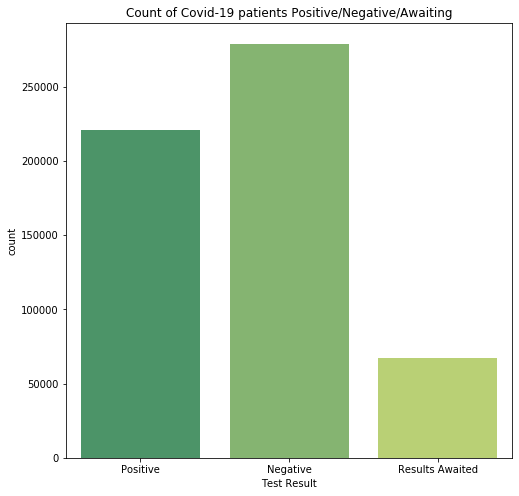

In [10]:
print(df_copy['covid_res'].value_counts())

plt.figure(figsize=(8,8))
plt.title("Count of Covid-19 patients Positive/Negative/Awaiting")
sns.countplot(df_copy['covid_res'],palette='summer')
plt.xticks(ticks=np.arange(3),labels=['Positive','Negative','Results Awaited'])
plt.xlabel("Test Result")
plt.show()

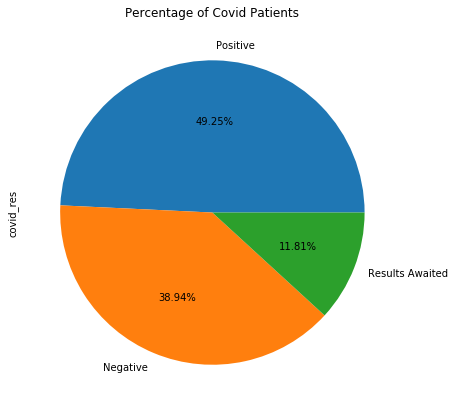

In [11]:
plt.figure(figsize=(7,7))
plt.title("Percentage of Covid Patients")
df_copy['covid_res'].value_counts().plot(kind='pie',labels=['Positive','Negative','Results Awaited'],autopct="%1.2f%%")
plt.show()

# Genderwise count Covid 19

Male      287112
Female    279490
Name: sex, dtype: int64


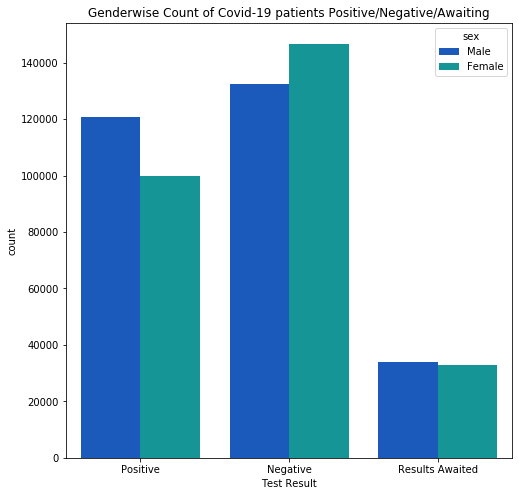

In [12]:
print(df_copy['sex'].value_counts())

plt.figure(figsize=(8,8))
plt.title("Genderwise Count of Covid-19 patients Positive/Negative/Awaiting")
sns.countplot(x='covid_res',hue='sex',data=df_copy,palette='winter')
plt.xticks(ticks=np.arange(3),labels=['Positive','Negative','Results Awaited'])
plt.xlabel("Test Result")
plt.show()

# Count of Inpatients and Outpatients

Outpatient    444689
Inpatient     121913
Name: patient_type, dtype: int64


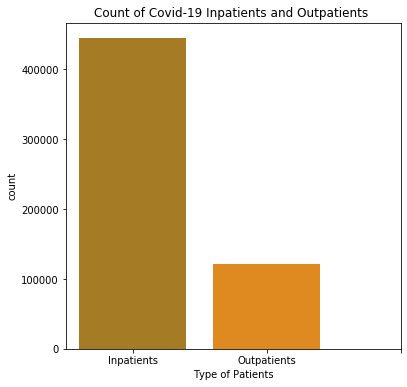

In [13]:
print(df_copy['patient_type'].value_counts())

plt.figure(figsize=(6,6))
plt.title("Count of Covid-19 Inpatients and Outpatients ")
sns.countplot(df_copy['patient_type'],palette='autumn_d')
plt.xticks(ticks=np.arange(3),labels=['Inpatients','Outpatients'])
plt.xlabel("Type of Patients")
plt.show()

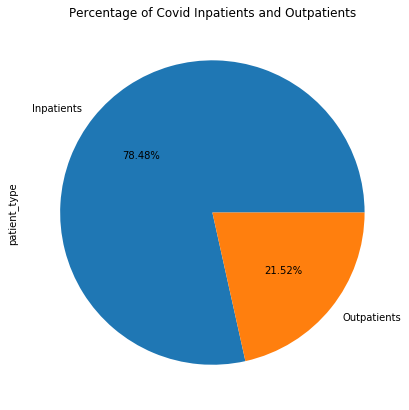

In [14]:
plt.figure(figsize=(7,7))
plt.title("Percentage of Covid Inpatients and Outpatients")
df_copy['patient_type'].value_counts().plot(kind='pie',labels=['Inpatients','Outpatients'],autopct="%1.2f%%")
plt.show()

# Intubed column

NA     444813
No     111824
Yes      9965
Name: intubed, dtype: int64


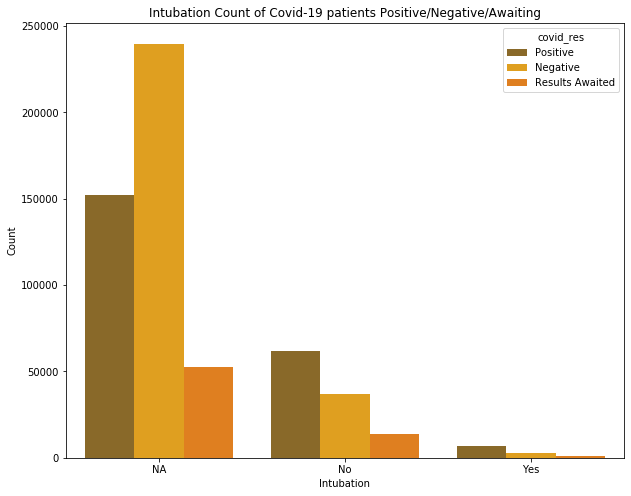

In [15]:
print(df_copy['intubed'].value_counts())

plt.figure(figsize=(10,8))
plt.title("Intubation Count of Covid-19 patients Positive/Negative/Awaiting")
sns.countplot(x='intubed',hue='covid_res',data=df_copy,palette='autumn_d')
plt.xlabel("Intubation")
plt.ylabel("Count")
plt.show()

Text(0.5, 0, 'Test Results')

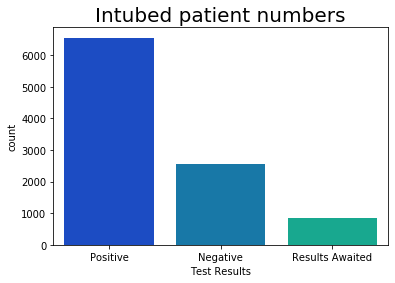

In [16]:
df_intubed=df[df['intubed']=='Yes']
sns.countplot('covid_res',data=df_intubed, palette='winter')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Test Results')

# Death Count 

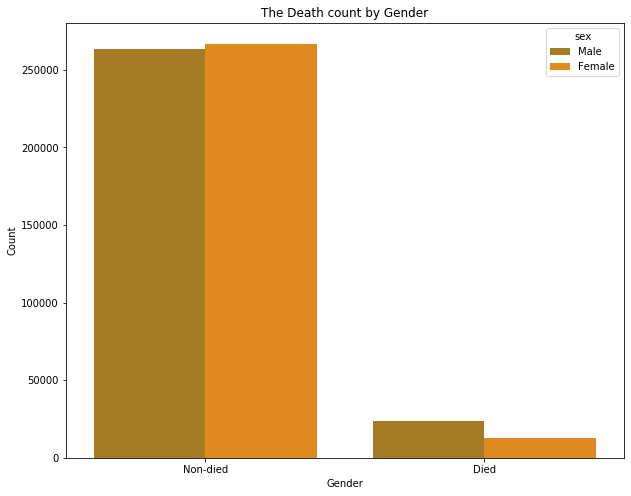

In [17]:
#Analysis of Death by Gender
df_copy['died'] = df_copy['date_died'].apply(lambda x: 'Non-died' if x == "NA" else 'Died')

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x ='died', hue ='sex', data = df_copy,palette='autumn_d')
plt.title('The Death count by Gender')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Pneumonia count 

Text(0.5, 1.0, 'Covid-19 patient with Pneumonia ')

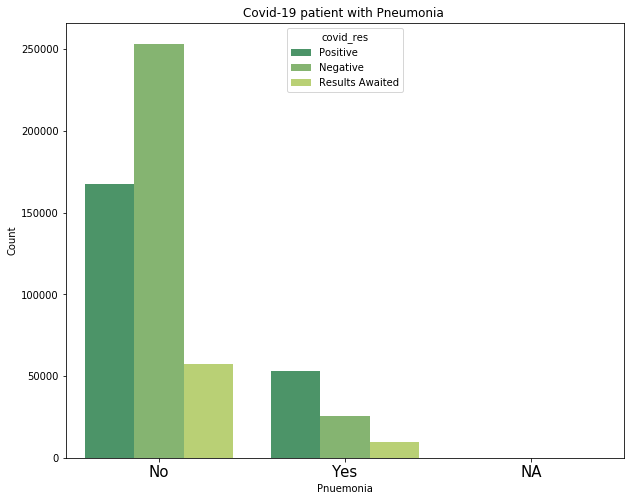

In [18]:
plt.figure(figsize=(10,8))
sns.countplot('pneumonia',hue='covid_res',data=df_copy,palette='summer')
plt.xticks(size=15,)
plt.xlabel('Pnuemonia')
plt.ylabel('Count')
plt.title('Covid-19 patient with Pneumonia ')

# Distribution of Age

Text(0.5, 1.0, 'COVID +ve case death with respect to age groups')

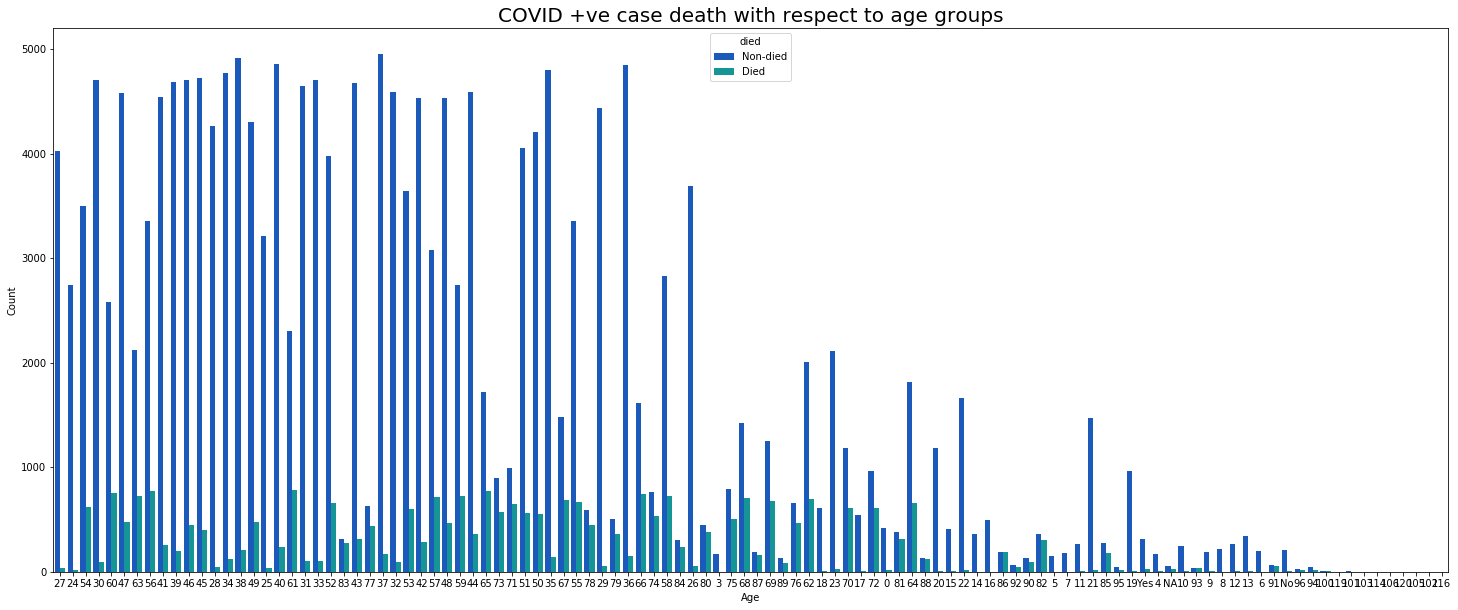

In [19]:
plt.figure(figsize=(25,10))
df_pos=df_copy[df_copy['covid_res']=='Positive']
sns.countplot('age',hue='died',data=df_pos,palette='winter')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('COVID +ve case death with respect to age groups',size=20)

# Other Medical Conditions 

Text(0.5, 0, 'Death rate: 15.70 %')

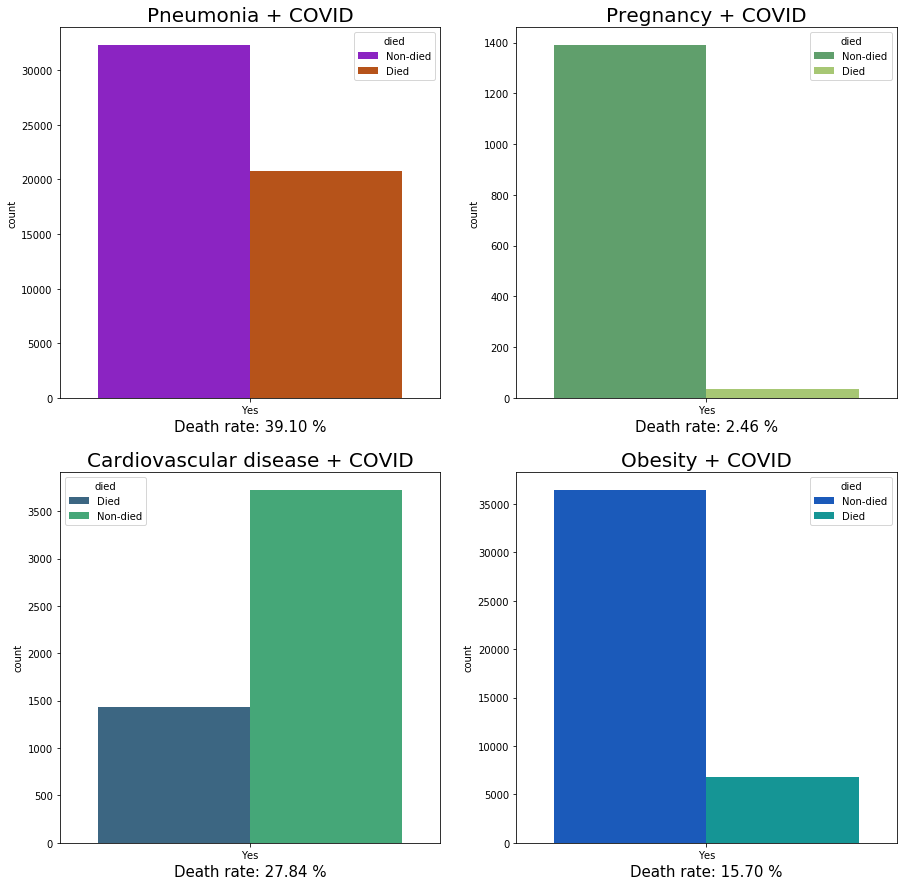

In [20]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.countplot('pneumonia',data=df_pneu,hue='died',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='died',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='died',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='died',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)

ax1.set_xlabel('Death rate: {0:.2f} %'.format(100*df_pneu['died'].value_counts()[1]/df_pneu['died'].shape[0]),size=15)
ax2.set_xlabel('Death rate: {0:.2f} %'.format(100*df_preg['died'].value_counts()[1]/df_preg['died'].shape[0]),size=15)
ax3.set_xlabel('Death rate: {0:.2f} %'.format(100*df_card['died'].value_counts()[1]/df_card['died'].shape[0]),size=15)
ax4.set_xlabel('Death rate: {0:.2f} %'.format(100*df_obes['died'].value_counts()[1]/df_obes['died'].shape[0]),size=15)

Pregnancy can not be the reason of Death

# ICU Patients count W. R. T. Gender, Covid Results, Death

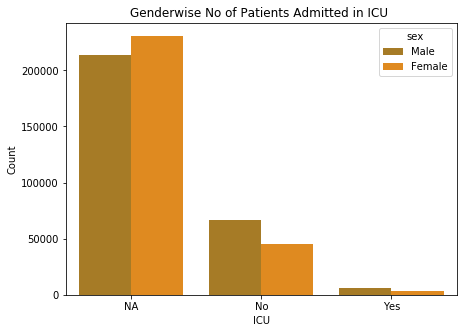

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x='icu',data=df_copy,hue='sex',palette='autumn_d')
plt.title("Genderwise No of Patients Admitted in ICU ")
plt.xlabel("ICU")
plt.ylabel("Count")
plt.show()

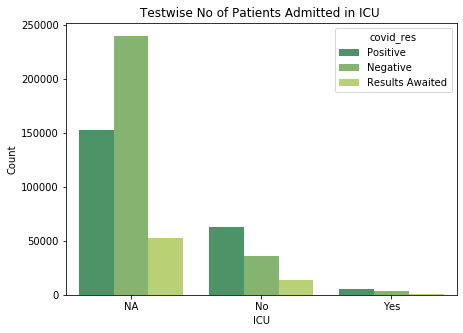

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='icu',data=df_copy,hue='covid_res',palette='summer')
plt.title("Testwise No of Patients Admitted in ICU ")
plt.xlabel("ICU")
plt.ylabel("Count")
plt.show()

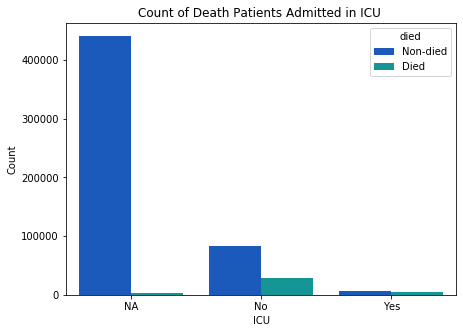

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x='icu',data=df_copy,hue='died',palette='winter')
plt.title("Count of Death Patients Admitted in ICU ")
plt.xlabel("ICU")
plt.ylabel("Count")
plt.show()

# Finding Null Values

Text(0.5, 1, 'Null value heatmap')

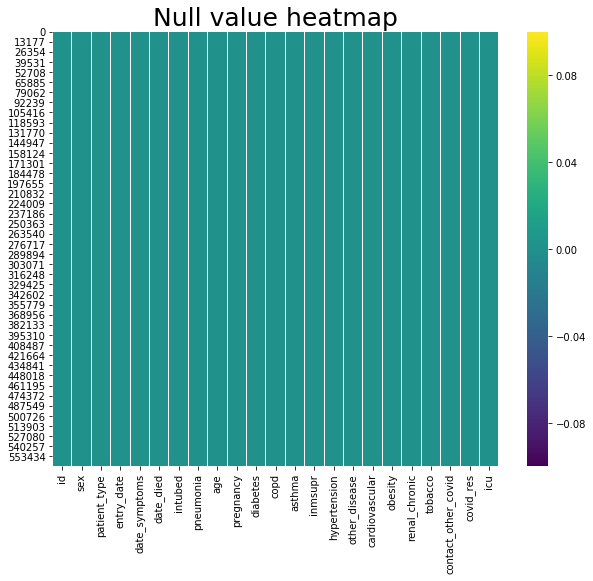

In [24]:
#Chkecking of Null Values

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=25)

In [25]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null object
patient_type           566602 non-null object
entry_date             566602 non-null datetime64[ns]
date_symptoms          566602 non-null datetime64[ns]
date_died              566602 non-null object
intubed                566602 non-null object
pneumonia              566602 non-null object
age                    566602 non-null object
pregnancy              566602 non-null object
diabetes               566602 non-null object
copd                   566602 non-null object
asthma                 566602 non-null object
inmsupr                566602 non-null object
hypertension           566602 non-null object
other_disease          566602 non-null object
cardiovascular         566602 non-null object
obesity                566602 non-null object
renal_chronic          566602 non-null object

# Column Drop

In [27]:
df=df.drop(['id','entry_date','date_symptoms','date_died'],axis=1)
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,Male,Outpatient,NA,No,27,NA,No,No,No,No,No,No,No,No,No,No,No,Positive,NA
1,Male,Outpatient,NA,No,24,NA,No,No,No,No,No,No,No,No,No,No,NA,Positive,NA
2,Female,Inpatient,No,No,54,No,No,No,No,No,No,No,No,Yes,No,No,NA,Positive,No
3,Male,Inpatient,No,Yes,30,NA,No,No,No,No,No,No,No,No,No,No,NA,Positive,No
4,Female,Inpatient,No,No,60,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NA,Positive,No


In [28]:
df = df.drop(df[df.covid_res=='Results Awaited'].index, axis=0)

# Converting Categorical Columns into Numerical

In [29]:
# Finding Categorical Columns
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']


In [30]:
# categorical_cols=['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']

In [31]:
for c in categorical_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
sex                    499692 non-null int64
patient_type           499692 non-null int64
intubed                499692 non-null int64
pneumonia              499692 non-null int64
age                    499692 non-null int64
pregnancy              499692 non-null int64
diabetes               499692 non-null int64
copd                   499692 non-null int64
asthma                 499692 non-null int64
inmsupr                499692 non-null int64
hypertension           499692 non-null int64
other_disease          499692 non-null int64
cardiovascular         499692 non-null int64
obesity                499692 non-null int64
renal_chronic          499692 non-null int64
tobacco                499692 non-null int64
contact_other_covid    499692 non-null int64
covid_res              499692 non-null int64
icu                    499692 non-null int64
dtypes: int64(19)
memory usage: 76